In [271]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import mca
import math as math
import xgboost as xgb

In [272]:
trset = pd.read_csv("train.csv")
trset


,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
3,6,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,9,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,...,NaN,NaN,4.986116e-02,X,NaN,NaN,1.536222,0,NaN,NaN
6,12,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
7,21,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,22,0,2.078651e+00,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00
9,23,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00


First we'll find out the number of available features (not NaN) in each sample.

In [273]:
trset_X = trset.drop(['ID','target'], axis=1)

In [274]:
trset_X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [275]:
trsetNaNnum = trset_X.notnull()
trsetNaNnum.astype(int)
trsetNaNnum['sum']=trsetNaNnum.sum(axis=1)
trsetNaNnum['ID'] = trset['ID']
trsetNaNnum.sort_values(by='sum',ascending=False)
trsetNaNnum = trsetNaNnum[['sum','ID']]
trsetNaNnum


,sum,ID
0,130,3
1,50,4
2,129,5
3,130,6
4,29,8
5,49,9
6,130,12
7,31,21
8,127,22
9,130,23


Now merging the above with the original dataframe

In [276]:
trsetsum = pd.merge(trset,trsetNaNnum)
trsetsum = trsetsum.sort_values(by='sum',ascending=False)
trsetsum

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v123,v124,v125,v126,v127,v128,v129,v130,v131,sum
18494,37033,1,2.544857e+00,8.886302,C,4.978156,8.422371,2.033492,2.488039,4.557424,...,3.086521,2.977296e+00,K,1.526933,3.027810,1.516576,0,1.701923,2.598870e+00,131
20271,40593,1,1.219398e+00,7.593828,C,3.575840,6.980498,2.071563,2.514124,0.089902,...,2.934009,8.987969e-03,BM,1.667445,3.019068,1.273173,0,2.531835,8.284022e-01,131
20287,40624,0,7.708331e-01,6.174703,C,3.550725,8.958954,1.850001,2.241666,0.360917,...,3.845692,5.879767e-02,BM,1.828769,1.625000,1.663707,0,2.884758,5.154638e-01,131
72203,144068,1,1.800486e+00,6.228345,C,2.803366,6.363956,1.751824,2.618005,0.249754,...,4.334267,5.374241e-02,BM,1.956043,3.175183,0.799320,0,2.319702,1.282052e+00,131
72204,144070,1,7.663482e-07,10.152567,C,4.881020,11.143241,2.898550,3.623188,0.004700,...,1.563375,2.033031e-02,P,2.204283,1.086956,5.609453,0,0.640001,-5.245674e-07,131
20280,40613,0,8.897786e-01,11.945232,C,5.136177,10.225986,2.725452,3.046092,0.305836,...,1.071136,4.566392e-01,A,1.950725,1.893787,2.962654,0,0.515790,2.448979e+00,131
72209,144077,0,2.334386e+00,7.503317,C,3.495485,8.157364,2.026814,2.381704,0.203609,...,4.311789,3.611457e-02,A,1.636450,3.593257,1.420720,0,2.145695,1.975309e+00,131
72215,144087,1,1.907217e+00,8.624481,C,4.342458,7.155346,1.649485,2.989691,0.008089,...,2.287296,-4.694559e-08,CJ,1.119997,2.899485,1.692686,0,1.103448,2.500000e+00,131
72218,144094,0,2.012799e+00,8.061974,C,4.568832,10.266293,3.379200,2.688000,0.485485,...,3.128863,4.779001e-01,CG,1.293246,1.476000,2.969759,0,1.561904,2.073170e+00,131
20274,40597,0,9.215440e-01,9.981734,C,4.802485,7.383994,2.141968,1.867995,0.032047,...,1.974583,7.689809e-02,V,1.461156,2.942093,1.783249,0,1.333334,1.600000e+00,131


How many of the samples are classified as 1:

In [277]:
trsetsum.target.sum()

87021

Total number of samples:

In [278]:
trsetsum.ID.count()

114321

Percentage of samples classified as 1:

In [279]:
trsetsum.target.sum()/trsetsum.ID.count()

0.76119872989214576

Number of samples with all 131 features:

In [280]:
trsetsum[trsetsum['sum']==131].ID.count()

17756

Let's plot a histogram of the number of features present in each sample.

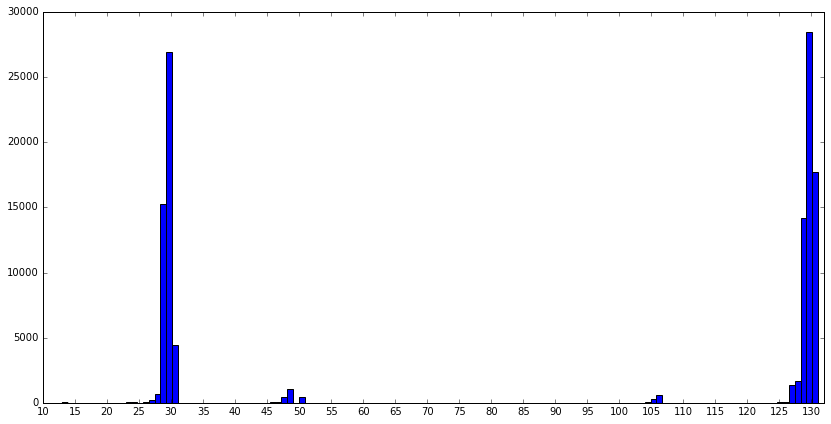

In [281]:
import matplotlib.ticker as ticker
tick_spacing = 5
fig, ax = plt.subplots(figsize=(14,7))

ax.hist(trsetsum['sum'],bins=131)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlim(10,132)
plt.show()

Most of the samples have either between 25 and 31, or between 125 and 131 features.

In [282]:
trsetsum27_31 = trsetsum[(trsetsum['sum']>26) & (trsetsum['sum']<32)]
trsetsum27_31.ID.count()

47570

In [283]:
trsetsum27_31.target.sum()/trsetsum27_31.ID.count()

0.77115829304183314

In [284]:
trsetsum127_131 = trsetsum[(trsetsum['sum']>126) & (trsetsum['sum']<132)]
trsetsum127_131.ID.count()

63490

In [285]:
trsetsum127_131.target.sum()/trsetsum127_131.ID.count()

0.75397700425263825

Earlier we had seen that 76.12% of the total training set was classified as 1, which is in between 75.4% and 77.1% for the two subsets.

In [286]:
(trsetsum27_31.ID.count()+trsetsum127_131.ID.count())/trset.ID.count()

0.97147505707612769

These two sets comprise 97.15% of the total dataset

Now, I'd like to separate the categorical features from the numerical ones. I will use the fact that means are only calculated for numerical features.

In [287]:
trset_means = trset.mean()


In [288]:
trset_meandf = trset_means.to_frame()

#trset_meandf.reset_index()
#trset_meandf.columns=['numvars','values']
catlabels = ['target'];
alllabels = list(trset.columns.values)
numlabels = list(trset_meandf.index.values)
for label in alllabels:
    if label not in numlabels:
        #print(label)
        catlabels.append(label)
print(catlabels)
len(catlabels)-1

['target', 'v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125']


19

We have 19 categorical variables (excluding target, which is not a feature)

Now let's focus on the set with between 27 and 31 features, and see if they are missing the same 100+ features. For this, I will find the list of features that have non-zero sum.

In [289]:
x = trsetsum27_31.sum().sort_values(ascending = False)
y = x[x>0]
print(y.count()-3)
y = y.sort_index()
y = y[3:]
y


12


v10      87397.177248
v114    658684.357123
v12     325197.604642
v129     14251.000000
v14     571941.208123
v21     330641.862494
v34     314694.495704
v38       4382.000000
v40     479946.401808
v50      73079.778279
v62      48328.000000
v72      66961.000000
dtype: float64

So, we have 12 numerical features that are available in this set. Combined with the 19 categorical features, this seems to give us the 31 features we were looking for. Let's confirm this.

In [290]:
x = trsetsum27_31[catlabels]
x

,target,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
88669,1,C,PFV,E,C,A,I,A,CN,B,F,B,D,C,A,E,A,A,P,W
12765,1,C,QJ,E,C,A,G,J,DL,C,F,B,D,M,F,A,A,P,T,P
19720,1,C,UPB,E,C,A,I,H,CY,A,F,B,D,C,B,B,A,H,G,AI
19729,1,C,YYU,D,C,B,C,D,DI,A,F,B,D,B,F,A,B,S,AC,AE
38276,1,C,KOX,E,C,A,C,D,AW,A,B,B,B,B,A,E,B,T,F,BU
10,1,C,GEH,E,D,A,I,E,CY,A,F,B,D,C,F,A,A,F,X,AR
32011,0,C,RSR,C,G,A,I,H,P,B,F,B,D,C,C,D,A,H,V,AJ
47279,1,C,AGHQ,E,C,A,I,A,DP,C,F,B,D,C,G,C,A,H,M,CD
72930,1,C,EBH,E,D,A,I,C,BJ,A,C,B,B,C,F,A,A,T,AB,BU
88813,1,C,MDU,E,C,A,I,G,BW,C,F,B,D,C,B,B,A,T,AC,CB


This shows that all of the 19 categorical variables occur at least once in each sample in this set.

In [291]:
y.index.values

array(['v10', 'v114', 'v12', 'v129', 'v14', 'v21', 'v34', 'v38', 'v40',
       'v50', 'v62', 'v72'], dtype=object)

In [292]:
clist1 = catlabels + list(y.index.values)
clist1.append('ID')
clist1 = sorted(clist1)

print(clist1)

['ID', 'target', 'v10', 'v107', 'v110', 'v112', 'v113', 'v114', 'v12', 'v125', 'v129', 'v14', 'v21', 'v22', 'v24', 'v3', 'v30', 'v31', 'v34', 'v38', 'v40', 'v47', 'v50', 'v52', 'v56', 'v62', 'v66', 'v71', 'v72', 'v74', 'v75', 'v79', 'v91']


In [293]:
trsetsum27_31red = trsetsum27_31[clist1]
trsetsum27_31red

,ID,target,v10,v107,v110,v112,v113,v114,v12,v125,...,v52,v56,v62,v66,v71,v72,v74,v75,v79,v91
88669,177060,1,1.838075e+00,E,A,A,P,14.086140,7.105565,W,...,A,CN,1,B,F,1,B,D,C,A
12765,25576,1,1.991246e+00,A,A,P,T,17.938847,6.231276,P,...,J,DL,2,C,F,2,B,D,M,F
19720,39489,1,1.006565e+00,B,A,H,G,12.105075,6.309066,AI,...,H,CY,1,A,F,1,B,D,C,B
19729,39512,1,5.229759e+00,A,B,S,AC,15.539274,8.336645,AE,...,D,DI,0,A,F,2,B,D,B,F
38276,76569,1,1.028446e+00,E,B,T,F,15.676546,6.196312,BU,...,D,AW,2,A,B,2,B,B,B,A
10,24,1,1.312910e+00,A,A,F,X,9.140132,6.527708,AR,...,E,CY,1,A,F,1,B,D,C,F
32011,64202,0,1.050327e+00,D,A,H,V,14.189759,6.659046,AJ,...,H,P,1,B,F,1,B,D,C,C
47279,94465,1,5.251639e-01,C,A,H,M,18.077554,6.293434,CD,...,A,DP,1,C,F,1,B,D,C,G
72930,145522,1,2.516411e+00,A,A,T,AB,14.942702,7.246821,BU,...,C,BJ,3,A,C,3,B,B,C,F
88813,177386,1,1.050329e+00,B,A,T,AC,13.083086,6.566650,CB,...,G,BW,2,C,F,2,B,D,C,B


In [294]:
trsetsum27_31red[list(y.index.values)]

,v10,v114,v12,v129,v14,v21,v34,v38,v40,v50,v62,v72
88669,1.838075e+00,14.086140,7.105565,0,13.105813,8.007531,6.754751,0,9.869763,0.789378,1,1
12765,1.991246e+00,17.938847,6.231276,0,12.419565,7.163703,9.928092,0,5.006151,3.531657,2,2
19720,1.006565e+00,12.105075,6.309066,0,11.409571,6.865428,4.565875,0,12.494031,1.305848,1,1
19729,5.229759e+00,15.539274,8.336645,2,14.347483,8.134341,9.128086,0,9.530425,4.290221,0,2
38276,1.028446e+00,15.676546,6.196312,0,12.148606,7.467185,7.406727,0,8.024020,1.663854,2,2
10,1.312910e+00,9.140132,6.527708,0,12.670870,7.824360,3.004667,0,15.270965,1.323454,1,1
32011,1.050327e+00,14.189759,6.659046,0,11.636386,6.971915,6.454704,0,9.551407,0.422567,1,1
47279,5.251639e-01,18.077554,6.293434,0,10.478942,6.712961,10.154012,0,3.173431,0.366812,1,1
72930,2.516411e+00,14.942702,7.246821,0,10.987261,5.367151,7.623945,0,9.178062,1.781234,3,3
88813,1.050329e+00,13.083086,6.566650,0,12.573678,7.899773,5.491499,0,11.074451,0.679333,2,2


In [295]:
trsetsum27_31red[['target','v129','v62','v72']]


,target,v129,v62,v72
88669,1,0,1,1
12765,1,0,2,2
19720,1,0,1,1
19729,1,2,0,2
38276,1,0,2,2
10,1,0,1,1
32011,0,0,1,1
47279,1,0,1,1
72930,1,0,3,3
88813,1,0,2,2


In [296]:
trsetsum27_31red[trsetsum27_31red['v72'] == trsetsum27_31red['v62']].v129.sum()

0

which shows that v129 is zero whenever v62 = v72

In [297]:
trsetsum27_31red.v129.unique()

array([0, 2, 1, 4, 3, 5, 6], dtype=int64)

In [298]:
trsetsum27_31red[catlabels]

,target,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
88669,1,C,PFV,E,C,A,I,A,CN,B,F,B,D,C,A,E,A,A,P,W
12765,1,C,QJ,E,C,A,G,J,DL,C,F,B,D,M,F,A,A,P,T,P
19720,1,C,UPB,E,C,A,I,H,CY,A,F,B,D,C,B,B,A,H,G,AI
19729,1,C,YYU,D,C,B,C,D,DI,A,F,B,D,B,F,A,B,S,AC,AE
38276,1,C,KOX,E,C,A,C,D,AW,A,B,B,B,B,A,E,B,T,F,BU
10,1,C,GEH,E,D,A,I,E,CY,A,F,B,D,C,F,A,A,F,X,AR
32011,0,C,RSR,C,G,A,I,H,P,B,F,B,D,C,C,D,A,H,V,AJ
47279,1,C,AGHQ,E,C,A,I,A,DP,C,F,B,D,C,G,C,A,H,M,CD
72930,1,C,EBH,E,D,A,I,C,BJ,A,C,B,B,C,F,A,A,T,AB,BU
88813,1,C,MDU,E,C,A,I,G,BW,C,F,B,D,C,B,B,A,T,AC,CB


In [299]:
for label in catlabels:
    print(label, len(trsetsum27_31red[label].unique()))

target 2
v3 4
v22 11934
v24 5
v30 8
v31 4
v47 9
v52 12
v56 108
v66 3
v71 5
v74 3
v75 4
v79 18
v91 7
v107 7
v110 3
v112 23
v113 37
v125 91


We have two sets of training data. One that has between 127 and 131 features, and the other, that has between 27 and 31 features.

In [300]:
trsmall = trsetsum27_31red
trsmall.sort_index()

,ID,target,v10,v107,v110,v112,v113,v114,v12,v125,...,v52,v56,v62,v66,v71,v72,v74,v75,v79,v91
4,8,1,1.050328,C,A,T,G,14.097099,6.320087,Z,...,H,NaN,1,C,F,1,B,D,C,G
7,21,1,1.838074,E,A,F,M,18.705610,6.424482,BY,...,C,DP,2,C,F,2,B,D,C,A
10,24,1,1.312910,A,A,F,X,9.140132,6.527708,AR,...,E,CY,1,A,F,1,B,D,C,F
11,27,1,1.028446,E,B,M,NaN,13.261054,5.987763,AM,...,A,AW,1,C,F,1,B,D,E,A
12,28,0,1.312911,C,A,T,P,14.359195,6.886729,Z,...,H,BW,1,C,F,1,B,D,C,G
15,32,1,1.312910,E,A,F,S,7.508456,6.428450,BY,...,C,CY,1,A,B,1,B,B,C,A
17,34,1,1.553611,E,B,T,NaN,14.164228,6.779448,Z,...,D,AZ,0,A,F,2,B,D,B,A
18,35,1,1.794310,B,B,J,NaN,16.185658,6.942488,E,...,C,Z,0,A,B,1,B,B,A,B
19,36,1,3.916848,C,B,F,NaN,13.894053,8.500203,AZ,...,C,DN,0,B,F,1,B,D,A,G
25,46,1,2.253830,A,A,D,W,14.497420,6.486413,CG,...,L,BJ,3,A,B,3,B,B,C,F


In [301]:
trlarge = trsetsum127_131
trlarge = trlarge.drop(['sum'],axis=1)
trlarge = trlarge.sort_index()
trlarge

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000e+00,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
2,5,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333e+00,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
3,6,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256e+00,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
6,12,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299e+00,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
8,22,0,2.078651e+00,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148e+00,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00
9,23,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843e+00,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00
13,30,1,1.400267e+00,5.367204,C,4.122155,8.137188,2.983080,2.640249,0.211851,...,8.817203e+00,2.096062,5.459061e-07,AQ,1.731656,6.102516,1.388117,4,1.220911,1.878453e+00
14,31,1,2.260036e+00,14.693263,C,5.150750,8.554136,1.954626,2.931936,0.041446,...,5.038168e+00,1.836667,5.973979e-03,Z,3.242128,0.818063,2.400050,0,1.166666,2.857143e+00
16,33,1,6.228961e-01,7.024732,C,4.193688,6.288177,2.132436,3.198654,0.407525,...,6.086957e+00,2.812624,2.474223e-01,BJ,1.865530,3.345960,0.796533,0,1.389474,6.060615e-01
20,37,1,9.438780e-01,5.927194,C,4.404372,9.045057,2.551021,2.693878,0.085665,...,6.632125e+00,2.419037,1.847926e-02,U,1.884567,2.602041,1.959776,1,1.121212,1.351351e+00


Let's find out which features are present in all samples. For this, we will find the features that have >0 null elements.

In [302]:
trimlist_S = []

for label in trsmall.columns.values:
    list1 = trsmall[label]

    if list1.isnull().sum()>0:
        trimlist_S.extend([label])
        print(label, list1.isnull().sum())


v112 226
v113 20458
v125 21
v21 207
v22 227
v3 532
v30 35125
v31 532
v56 3151


In [303]:
print(trimlist_S)
len(trimlist_S)

['v112', 'v113', 'v125', 'v21', 'v22', 'v3', 'v30', 'v31', 'v56']


9

In [304]:
trimlist_L = []

for label in trlarge.columns.values:
    list1 = trlarge[label]
    if list1.isnull().sum()>0:
        print(label, list1.isnull().sum())
        trimlist_L.extend([label])

v3 2746
v9 1
v21 303
v22 219
v30 23680
v31 2746
v56 3448
v70 1
v80 1
v87 24
v98 18
v102 606
v105 24
v112 52
v113 33548
v122 1
v125 6


In [305]:
print(trimlist_L)
len(trimlist_L)

['v3', 'v9', 'v21', 'v22', 'v30', 'v31', 'v56', 'v70', 'v80', 'v87', 'v98', 'v102', 'v105', 'v112', 'v113', 'v122', 'v125']


17

So, in our 27-31 feature set, we have 22 features which are present in all samples. Similarly, for the 127-131 feature set, we have 114 features present in all samples.

We note that v9, v70, v80 and v122 are null only once each. We check if they are all null for the same sample.

In [306]:
trl_v70null = trlarge[trlarge['v70'].isnull()]

print(trl_v70null.v9)
print(trl_v70null.v80)
print(trl_v70null.v122)


34887    10.000001
Name: v9, dtype: float64
34887    3.333333
Name: v80, dtype: float64
34887    6.666667
Name: v122, dtype: float64


We find that that is not the case.

In [307]:
trl_v80null = trlarge[trlarge['v80'].isnull()]

print(trl_v80null.v9)
print(trl_v80null.v70)
print(trl_v80null.v122)
print(trl_v80null.ID)


109881   NaN
Name: v9, dtype: float64
109881    11.678001
Name: v70, dtype: float64
109881   NaN
Name: v122, dtype: float64
109881    219760
Name: ID, dtype: int64


However, we do find that v80, v9 and v122 are null for ID 219760. We will drop this row from trlarge.

In [308]:
trlarge = trlarge[trlarge.ID != 219760]

trimlist_L = []

for label in trlarge.columns.values:
    list1 = trlarge[label]
    if list1.isnull().sum()>0:
        print(label, list1.isnull().sum())
        trimlist_L.extend([label])

print(trimlist_L)
len(trimlist_L)

v3 2746
v21 303
v22 219
v30 23680
v31 2746
v56 3448
v70 1
v87 24
v98 17
v102 606
v105 24
v112 52
v113 33548
v125 6
['v3', 'v21', 'v22', 'v30', 'v31', 'v56', 'v70', 'v87', 'v98', 'v102', 'v105', 'v112', 'v113', 'v125']


14

At this point, we can consider using two classifiers for the two training data subsets. Let us confirm that the test data is also substantively represented by the same selection of features.

In [309]:
tset = pd.read_csv("test.csv")

tset_X = tset.drop(['ID'], axis=1)

In [310]:
tsetNaNnum = tset_X.notnull()
tsetNaNnum.astype(int)
tsetNaNnum['sum']=tsetNaNnum.sum(axis=1)
tsetNaNnum['ID'] = tset['ID']
tsetNaNnum.sort_values(by='sum',ascending=False)
tsetNaNnum = tsetNaNnum[['sum','ID']]


In [311]:
tsetsum = pd.merge(tset,tsetNaNnum)
tsetsum = tsetsum.sort_values(by='sum',ascending=False)


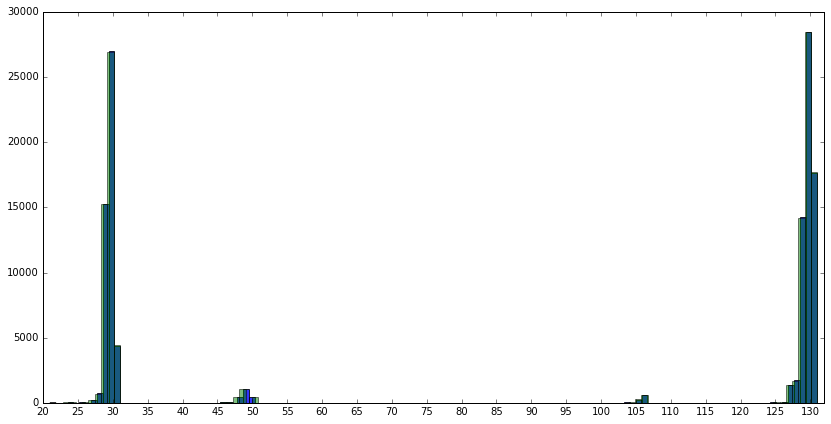

In [312]:
import matplotlib.ticker as ticker
tick_spacing = 5
fig, ax = plt.subplots(figsize=(14,7))

ax.hist(tsetsum['sum'],bins=131,alpha=0.8)
ax.hist(trsetsum['sum'],bins=131,alpha=0.5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlim(20,132)
plt.show()

In [313]:
tsetsum27_31 = tsetsum[(tsetsum['sum']>26) & (tsetsum['sum']<32)]
tsetsum127_131 = tsetsum[(tsetsum['sum']>126) & (tsetsum['sum']<132)]


In [314]:
(tsetsum27_31.ID.count()+tsetsum127_131.ID.count())/tset.ID.count()

0.97148426914234265

In [315]:
(trsetsum27_31.ID.count()+trsetsum127_131.ID.count())/trset.ID.count()

0.97147505707612769

This shows that the training and test data are very similar in terms of the distribution of features across samples.

v113 and v30 are the features with the largest number of null values in both subsets. 

In [316]:
trlarge.v113.unique()

array([nan, 'P', 'G', 'I', 'AC', 'B', 'N', 'S', 'X', 'U', 'AE', 'M', 'V',
       'AF', 'AG', 'AB', 'L', 'Q', 'R', 'Y', 'AJ', 'W', 'F', 'AH', 'E',
       'C', 'A', 'Z', 'AI', 'J', 'O', 'T', 'AD', 'D', 'H'], dtype=object)

In [317]:
trsmall.v113.unique()

array(['P', 'T', 'G', 'AC', 'F', 'X', 'V', 'M', 'AB', 'U', 'W', 'B', 'Y',
       'AF', 'S', 'AH', 'I', 'J', 'N', 'C', 'A', 'Q', 'AJ', 'AD', 'AG',
       'H', 'Z', 'O', 'AE', 'L', 'E', 'AI', 'R', 'D', nan, 'AK', 'AA'], dtype=object)

In [318]:
trlarge.v30.unique()

array(['C', nan, 'G', 'B', 'D', 'A', 'F', 'E'], dtype=object)

In [319]:
trsmall.v30.unique()

array(['C', 'D', 'G', 'A', 'E', 'F', 'B', nan], dtype=object)

For a first pass at classification, we will drop v30 and v113 from both sets.  Also, since we saw earlier, that v22 had over 11000 values, we will drop that as well for the first iteration.

In [320]:
trsmall_1 = trsmall.drop(['v30','v113','v22'], axis=1)
trlarge_1 = trlarge.drop(['v30','v113','v22'], axis=1)


In [321]:
to_remove = ['v30','v113','v22','target']

In [322]:
newcats = list(set(catlabels) - set(to_remove))
print(newcats)
print(catlabels)

['v56', 'v24', 'v3', 'v52', 'v74', 'v75', 'v31', 'v66', 'v125', 'v112', 'v110', 'v47', 'v79', 'v71', 'v91', 'v107']
['target', 'v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125']


In [339]:
smalldum = pd.get_dummies(trsmall[newcats], drop_first=True)
largedum = pd.get_dummies(trlarge[newcats], drop_first=True)


In [340]:
smalldum

,v56_AA,v56_AC,v56_AE,v56_AF,v56_AG,v56_AH,v56_AI,v56_AJ,v56_AK,v56_AL,...,v91_D,v91_E,v91_F,v91_G,v107_B,v107_C,v107_D,v107_E,v107_F,v107_G
88669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
72930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [341]:
largedum

,v56_AA,v56_AB,v56_AC,v56_AF,v56_AG,v56_AH,v56_AI,v56_AJ,v56_AK,v56_AL,...,v91_D,v91_E,v91_F,v91_G,v107_B,v107_C,v107_D,v107_E,v107_F,v107_G
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [342]:
trsmall_1_features = pd.concat([trsmall_1,smalldum],axis=1)
trsmall_1_features = trsmall_1_features.drop(['ID'], axis=1)
for label in newcats:
    trsmall_1_features = trsmall_1_features.drop(label,axis=1)
    print(label)


v56
v24
v3
v52
v74
v75
v31
v66
v125
v112
v110
v47
v79
v71
v91
v107


In [343]:
trlarge_1_features = pd.concat([trlarge_1,largedum],axis=1)
trlarge_1_features = trlarge_1_features.drop(['ID'], axis=1)
for label in newcats:
    trlarge_1_features = trlarge_1_features.drop(label,axis=1)
    print(label)


v56
v24
v3
v52
v74
v75
v31
v66
v125
v112
v110
v47
v79
v71
v91
v107


In [344]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV



In [345]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[['target']].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds, verbose_eval=1)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['target'],eval_metric='logloss')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['target'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['target'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return feat_imp

[0]	train-logloss:0.654769+0.000138983	test-logloss:0.655142+0.000241646
[1]	train-logloss:0.624519+0.00134728	test-logloss:0.62516+0.00145874
[2]	train-logloss:0.598931+0.00132401	test-logloss:0.599817+0.00171749
[3]	train-logloss:0.577398+0.000962203	test-logloss:0.578586+0.0011821
[4]	train-logloss:0.55906+0.00101631	test-logloss:0.560645+0.00118263
[5]	train-logloss:0.54346+0.000807998	test-logloss:0.545379+0.00105961
[6]	train-logloss:0.530726+0.00120629	test-logloss:0.532957+0.00126335
[7]	train-logloss:0.520383+0.00154881	test-logloss:0.52298+0.00100603
[8]	train-logloss:0.511121+0.0019101	test-logloss:0.513963+0.00108653
[9]	train-logloss:0.502667+0.00165774	test-logloss:0.505896+0.000996011
[10]	train-logloss:0.495723+0.00124998	test-logloss:0.499219+0.000927174
[11]	train-logloss:0.489408+0.00108241	test-logloss:0.493224+0.000890582
[12]	train-logloss:0.483967+0.00112667	test-logloss:0.488125+0.00113685
[13]	train-logloss:0.479363+0.0014443	test-logloss:0.483828+0.00117446
[1

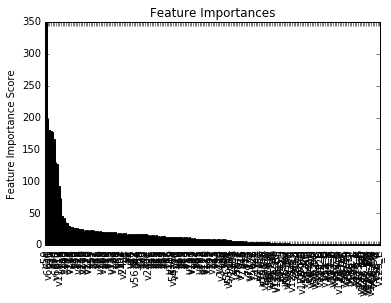

In [346]:
#Choose all predictors except target & IDcols
predictors_small = [x for x in trsmall_1_features.columns if x != 'target']
predictors_large = [x for x in trlarge_1_features.columns if x != 'target']

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

feat_imp_small = modelfit(xgb1, trsmall_1_features, predictors_small)
feat_imp_large = modelfit(xgb1, trlarge_1_features, predictors_large)


In [348]:
feat_imp_large


v50        198
v66_C       65
v40         57
v21         54
v10         52
v34         51
v66_B       50
v12         49
v110_B      43
v14         42
v114        40
v80         34
v102        33
v88         31
v127        30
v118        27
v6          27
v23         26
v39         26
v99         26
v124        25
v28         25
v119        25
v100        24
v78         23
v122        23
v120        23
v45         23
v57         23
v1          23
          ... 
v112_F       1
v112_D       1
v112_C       1
v52_B        1
v75_D        1
v125_AG      1
v91_F        1
v91_C        1
v56_AS       1
v56_AR       1
v56_CI       1
v56_DI       1
v125_Z       1
v52_L        1
v125_S       1
v125_L       1
v125_K       1
v125_H       1
v125_CG      1
v125_BW      1
v125_BV      1
v125_BN      1
v125_BM      1
v125_BK      1
v125_AW      1
v56_DS       1
v56_DX       1
v52_G        1
v56_R        1
v125_E       1
dtype: int64